# Libraries

Data manipulation

In [ ]:
import numpy as np
import pandas as pd
import itertools
import random as rn

Data visualization libraries

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Data preparation and models

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, LeakyReLU, Dropout

np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

2021-09-27 02:27:41.945297: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-27 02:27:41.945366: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Manipulation

### Data exploration

Data source &amp; data collections ...

Focus on pre-recorded csv files

In [ ]:
df = pd.read_csv('btc_cm_metrics_final.csv')
coin_name = "BTC"
#df = pd.read_csv('eth_cm_metrics_final.csv')
#coin_name = "ETH"
#df = pd.read_csv('ltc_cm_metrics_final.csv')
#coin_name = "LTC"
#df = pd.read_csv('doge_cm_metrics_final.csv')
#coin_name = "DOGE"
df.head()

# slice to a few columns to start
df = df[['date', 'PriceUSD', 'TxCnt', 'FeeMeanUSD', 'CapMrktCurUSD']]

# convert date attribute to datetime 
df.date = pd.to_datetime(df.date)#.dt.strftime('%Y-%m-%d')

# sort the dataset based on dates
df = df.sort_values('date')

In [ ]:
df.head()

,date,PriceUSD,TxCnt,FeeMeanUSD,CapMrktCurUSD
0,2010-01-01 00:00:00+00:00,NaN,2.0,NaN,NaN
1,2010-01-02 00:00:00+00:00,NaN,0.0,NaN,NaN
2,2010-01-03 00:00:00+00:00,NaN,0.0,NaN,NaN
3,2010-01-04 00:00:00+00:00,NaN,2.0,NaN,NaN
4,2010-01-05 00:00:00+00:00,NaN,0.0,NaN,NaN


In [ ]:
df.tail()

,date,PriceUSD,TxCnt,FeeMeanUSD,CapMrktCurUSD
4277,2021-09-17 00:00:00+00:00,47213.794129,273808.0,2.587788,8.884999e+11
4278,2021-09-18 00:00:00+00:00,48204.013652,227894.0,2.445872,9.071812e+11
4279,2021-09-19 00:00:00+00:00,47218.473996,199632.0,1.953428,8.886809e+11
4280,2021-09-20 00:00:00+00:00,42855.510345,273371.0,2.219487,8.066112e+11
4281,2021-09-21 00:00:00+00:00,40526.489376,245996.0,2.422268,7.628063e+11


In [ ]:
df.describe()

,PriceUSD,TxCnt,FeeMeanUSD,CapMrktCurUSD
count,4084.000000,4282.000000,4084.000000,4.084000e+03
mean,5709.288371,156825.543204,1.920999,1.034382e+11
std,11332.736962,124831.899203,5.343191,2.116611e+11
min,0.050541,0.000000,0.000000,1.776705e+05
25%,92.677576,37143.000000,0.035296,1.047622e+09
50%,600.739412,153396.500000,0.145361,8.213095e+09
75%,7236.009425,273103.250000,1.113889,1.280311e+11
max,63445.638314,498142.000000,60.949968,1.185279e+12


Visualization of historical price

In [ ]:
# Focus on price column, which is the target variable to predict
price = df[['date', 'PriceUSD']]

In [ ]:
price

,date,PriceUSD
0,2010-01-01 00:00:00+00:00,NaN
1,2010-01-02 00:00:00+00:00,NaN
2,2010-01-03 00:00:00+00:00,NaN
3,2010-01-04 00:00:00+00:00,NaN
4,2010-01-05 00:00:00+00:00,NaN
...,...,...
4277,2021-09-17 00:00:00+00:00,47213.794129
4278,2021-09-18 00:00:00+00:00,48204.013652
4279,2021-09-19 00:00:00+00:00,47218.473996
4280,2021-09-20 00:00:00+00:00,42855.510345


In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 0 to 4281
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      4282 non-null   datetime64[ns, UTC]
 1   PriceUSD  4084 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 100.4 KB


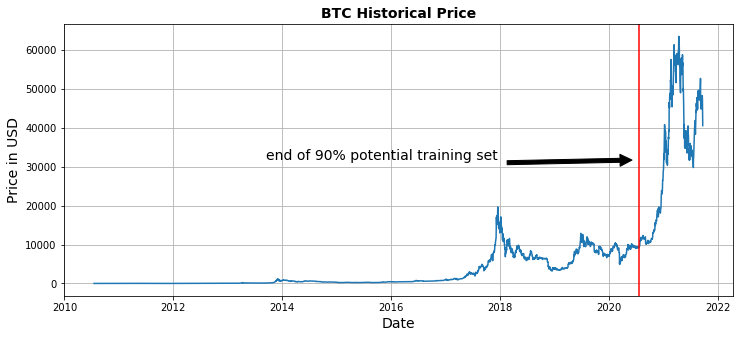

In [ ]:
# plot price for historical data

plt.figure(figsize = (12, 5))
#plt.plot(price['PriceUSD'])
plt.plot(price['date'], price['PriceUSD'])
#plt.xticks(range(0, df.shape[0], 180), df['date'].loc[::180], rotation=45)
#plt.xticks(range(0, price.shape[0], 180), price['date'].loc[::180], rotation=45)
plt.title('{} Historical Price'.format(coin_name), fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)


time_index_split = int(np.round((len(price)*.90)))   

plt.axvline(x=price.iloc[time_index_split]['date'] , color='r', label='axvline - full height')
#plt.legend(['historical price', 'cutoff at 90%'])


arrow_start = price.iloc[time_index_split]['date'] #+ timedelta(days = 730)
text_start = price.iloc[time_index_split -2500]['date'] #+ timedelta() 

plt.annotate('end of 90% potential training set', xy=(arrow_start, price['PriceUSD'].max()/2), xytext=(text_start, price['PriceUSD'].max()/2),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 14
            )



plt.grid()
plt.show()

### Data preparation

Delete nan(s)

In [ ]:
# note: might be better to remove nans from the master dataframe, but keep this for now
price = price.dropna()
price

,date,PriceUSD
198,2010-07-18 00:00:00+00:00,0.085840
199,2010-07-19 00:00:00+00:00,0.080800
200,2010-07-20 00:00:00+00:00,0.074736
201,2010-07-21 00:00:00+00:00,0.079193
202,2010-07-22 00:00:00+00:00,0.058470
...,...,...
4277,2021-09-17 00:00:00+00:00,47213.794129
4278,2021-09-18 00:00:00+00:00,48204.013652
4279,2021-09-19 00:00:00+00:00,47218.473996
4280,2021-09-20 00:00:00+00:00,42855.510345


Normalization

In [ ]:
scaler = MinMaxScaler()

# Fit the scaler with the portion of the dataset that will go to the training set
train_split_value = 0.9
num_train = int(np.round(train_split_value * price.shape[0]))

#scaler.fit(price[:num_train][['PriceUSD']])
#normalized_price = scaler.transform(price[['PriceUSD']])


scaler.fit(price[:num_train][['PriceUSD']].values)
normalized_price = pd.DataFrame()
normalized_price['date'] = price['date']
normalized_price['Price'] = scaler.transform(price[['PriceUSD']])

In [ ]:
normalized_price

,date,Price
198,2010-07-18 00:00:00+00:00,1.797278e-06
199,2010-07-19 00:00:00+00:00,1.540665e-06
200,2010-07-20 00:00:00+00:00,1.231901e-06
201,2010-07-21 00:00:00+00:00,1.458837e-06
202,2010-07-22 00:00:00+00:00,4.037146e-07
...,...,...
4277,2021-09-17 00:00:00+00:00,2.403902e+00
4278,2021-09-18 00:00:00+00:00,2.454319e+00
4279,2021-09-19 00:00:00+00:00,2.404140e+00
4280,2021-09-20 00:00:00+00:00,2.181998e+00


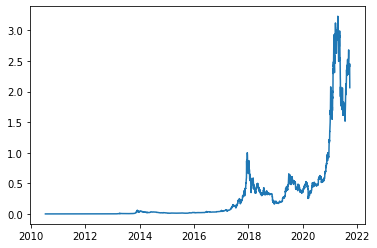

In [ ]:
plt.plot(normalized_price['date'], normalized_price['Price'])

Split data for training and testing

In [ ]:
def data_sequences(dataset, dates, target_size):
    d = []
    dt = []

    for idx in range(len(dataset) - target_size):
        d.append(dataset[idx : idx+target_size])
        dt.append(dates[idx : idx+target_size])

    return np.array(d), np.array(dt)


def split_dataset(dataset, dates, target_size, train_split=0.9):

    data, dt = data_sequences(dataset, dates, target_size)
    print(data.shape)

    num_train = int(np.round(train_split_value * price.shape[0]))

    window_size_adj_split_index = num_train - target_size

    X_train = data[:window_size_adj_split_index, :-1, :]
    y_train = data[:window_size_adj_split_index, -1, :]
    print(X_train.shape)

    X_test = data[window_size_adj_split_index:, :-1, :]
    y_test = data[window_size_adj_split_index:, -1, :]
    print(X_test.shape)

    dt = dt[window_size_adj_split_index:, -1, :]
    print(dt.shape)

    return X_train, y_train, X_test, y_test, dt


# Model

### Build the model

In [ ]:
def build_model(X_train, window, num_neurons = 128, activation_function = 'linear'):
    
    model = Sequential([
        LSTM(units=num_neurons, input_shape=(window, X_train.shape[-1]), return_sequences=True),
        LeakyReLU(alpha=0.8),
        LSTM(units=num_neurons, return_sequences=True),
        LeakyReLU(alpha=0.8),
        Dropout(0.2), 
        LSTM(units=int(num_neurons/2), return_sequences=False),
        Dropout(0.2), 
        Dense(units=1, activation=activation_function)
    ])

    return model


def epochs_loss(model, loss_function = 'mean_squared_error', optimizer='adam'):
     #'mean_absolute_error'
    model.compile(
        loss=loss_function, 
        optimizer='adam'
    )

    return model

### Prediction

In [ ]:
windows = [1, 7, 30, 90] #, 200] #, 365]

mae = []
losses = []
predictions = []
test_dates = []

for wd in windows:
    #X_train, y_train, X_test, y_test = split_dataset(normalized_price, target_size = wd + 1, train_split=train_split_value)

    X_train, y_train, X_test, y_test, date_test = split_dataset(normalized_price[['Price']], 
                                                                normalized_price[['date']], 
                                                                target_size = wd + 1, 
                                                                train_split=train_split_value)
    
    model = build_model(X_train, wd, num_neurons = 128, activation_function = 'linear')
    model = epochs_loss(model, loss_function = 'mean_squared_error', optimizer='adam')
    print(model.summary())

    history = model.fit(
        X_train, 
        y_train, 
        epochs=25, 
        batch_size=64, 
        shuffle=False,
        validation_split=0.1
    )

    y_pred = model.predict(X_test)
    y_pred_inverse = scaler.inverse_transform(y_pred)
    y_test_inverse = scaler.inverse_transform(y_test)
    #scaler.inverse_transform(y_pred)

    test_dates.append(date_test)
    predictions.append(y_pred_inverse)
    #predictions.append(list(itertools.chain(*y_pred_inverse)))
    mae.append(tf.keras.metrics.mean_absolute_error(y_pred_inverse.T, y_test_inverse.T).numpy())
    losses.append((history.history['loss'], history.history['val_loss']))

(4082, 2, 1)
(3674, 1, 1)
(408, 1, 1)
(408, 1)
2021-09-27 02:27:50.397182: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-27 02:27:50.397419: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-27 02:27:50.397443: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-27 02:27:50.397462: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-465bb6a2-b771-4fe2-b2d2-aed723f7eb7d): /proc/driver/nvidia/version does not exist
2021-09-27 02:27:50.397675: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AV

In [ ]:
#len(predictions[0])

In [ ]:
#np.concatenate((a, b)).T[0]

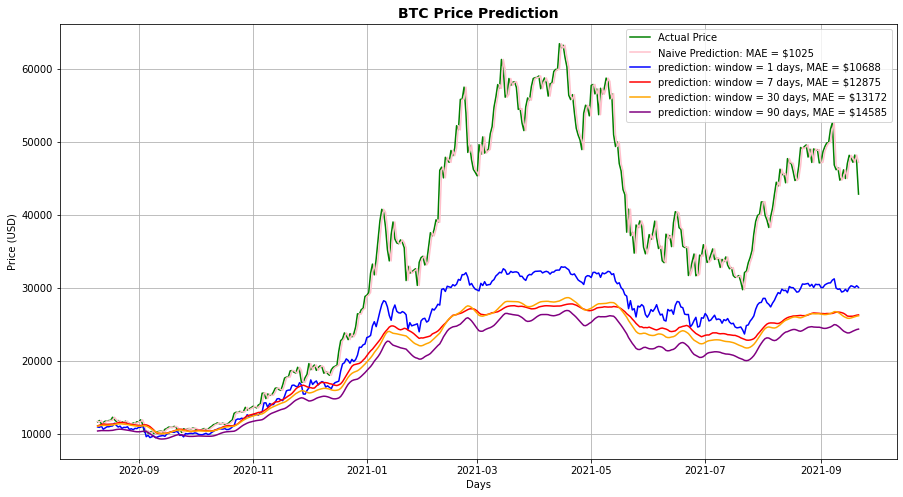

In [ ]:
plt.figure(figsize = (15,8))

a = scaler.inverse_transform(y_train)[-1].reshape(-1,1)
b = y_test_inverse[:-1]

naive_mae = round(tf.keras.metrics.mean_absolute_error(np.concatenate((a, b)).T, y_test_inverse.T).numpy()[0])


plt.plot(df['date'][-len(y_test_inverse):], y_test_inverse, color='green') #, label="Actual Price"

plt.plot(df['date'][-len(y_test_inverse):], np.concatenate((a, b)).T[0], color='pink') #, label="Naive Prediction"

##plt.plot(list(itertools.chain(*y_test_inverse)), color='green') #, label="Actual Price"
##plt.plot(test, list(itertools.chain(*y_test_inverse)), color='green') #, label="Actual Price"
##print(price.index)

colors = ['blue', 'red', 'orange', 'purple', 'gray', 'black']
leg = []
for idx, pred in enumerate(predictions):
    plt.plot(df['date'][-len(y_test_inverse):], pred, color=colors[idx])
    leg.append('prediction: window = {} days, MAE = ${}'.format(windows[idx], round(np.float_(mae[idx]))))

#dates = pd.DataFrame(list(itertools.chain(*price[num_train+1:-1][['date']].values)))
#plt.xticks(range(0, dates.shape[0], 30), dates[0].loc[::30], rotation=45)
##plt.xticks(range(0, price.shape[0], 180), price['date'].loc[::180], rotation=45)

plt.title('{} Price Prediction'.format(coin_name), fontsize=14, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
#plt.legend(leg, loc='best')
plt.legend(["Actual Price", "Naive Prediction: MAE = ${}".format(naive_mae)] + leg, loc='best')

plt.grid() 
plt.show()

# 13486, 10276, 10762

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=465bb6a2-b771-4fe2-b2d2-aed723f7eb7d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>